# **Análisis de datos**
## Ana Isabel Moreno Hernández
### NUA: 434232
### **Tarea 8**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import corner
import scipy.stats

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
np.random.seed(4)

Generamos los puntos aleatorios que puedan ajustarse a la recta $y = 3x + 2$.

In [4]:
x = np.linspace(0, 2, 15)
y_old = 3*x + 2
y = 3*x + 2

error = np.random.normal(0,0.2, size=15)
yerror = []

for i in range(15):
    y[i] = y[i] + error[i]
    yerror.append(0.2)

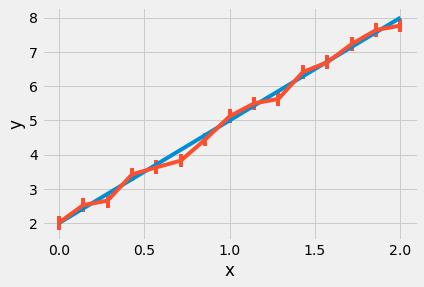

In [5]:
plt.plot(x, y_old)
plt.errorbar(x, y,yerr = yerror, markersize = 0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.grid('True')

In [6]:
x = np.array([x])
y = np.array([y])
yerror = np.array([yerror])

Funciones necesarias para realizar el método de metrópolis. 

In [7]:
def function(x0, a0, b0):
    return a0*x0 + b0

def likelihood(a, b, data):
    equis = data[0]
    ye = data[1]
    yerr = data[2] 
    model = function(equis, a, b)
    likelihood_0 = (ye-model)**2/(yerr**2)
    return likelihood_0.sum()

Para un solo camino, inicializamos a0 y b0, además de un rango de iteraciones para encontrar los valores que mejor se ajustan a la pendiente y a la ordenada de la recta. 

In [8]:
rango = 2000

a0 = 2.1
b0 = 1.1
lnlike0 = -1*likelihood(a0, b0, [x,y,yerror])

a_sample = [a0]
b_sample = [b0]

sigma = 0.01

for j in range(1,rango):
    a_new = np.random.normal(a_sample[len(a_sample)-1], sigma)
    b_new = np.random.normal(b_sample[len(a_sample)-1], sigma)
    like = -1*likelihood(a_new, b_new, [x,y,yerror])
    if like>lnlike0:
        lnlike0 = like
        a_sample.append(a_new)
        b_sample.append(b_new)
    elif lnlike0-like<-math.log(random.uniform(0,1)):
        lnlike0 = like
        a_sample.append(a_new)
        b_sample.append(b_new)

Graficamos el camino que se siguió para llegar a los valores de a y b correctos.

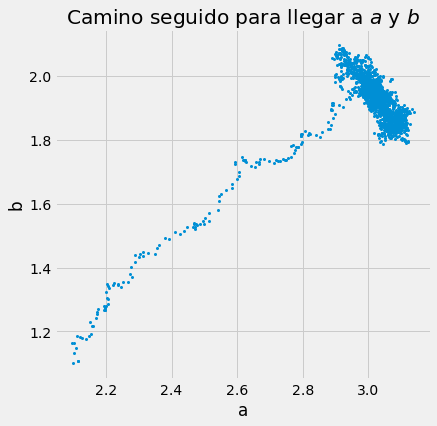

In [9]:
plt.figure(figsize = (6,6))
plt.plot(a_sample,b_sample, 'o', markersize = 2)
plt.xlabel('a')
plt.ylabel('b')
plt.title('Camino seguido para llegar a $a$ y $b$')
plt.grid('True')

Quitamos el burning eligiendo sólo las últimas iteraciones del camino seguido y hacemos un histograma de los valores de $a$.

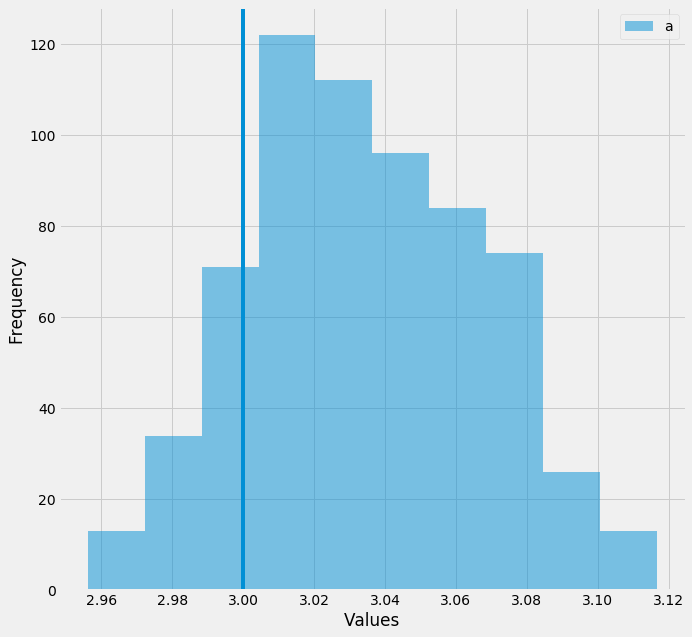

In [10]:
plt.figure(figsize = (10,10))
plt.hist(a_sample[1000: 2000], label = 'a',alpha=0.5);
plt.grid('True')
plt.xlabel('Values')
plt.axvline(3)
plt.legend()
plt.ylabel('Frequency');

Ahora realizamos una gráfica de los valores de $a$ contra el número de iteraciones para saber a qué valor converge. |

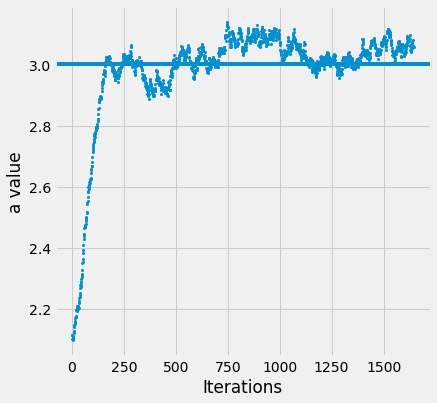

In [11]:
iteraciones = np.linspace(1, len(a_sample), len(a_sample))

plt.figure(figsize = (6,6))
plt.plot(iteraciones, a_sample, 'o', markersize = 2)
plt.grid('True')
plt.xlabel('Iterations')
plt.axhline(3)
plt.ylabel('a value');

Lo mismo hacemos para $b$.

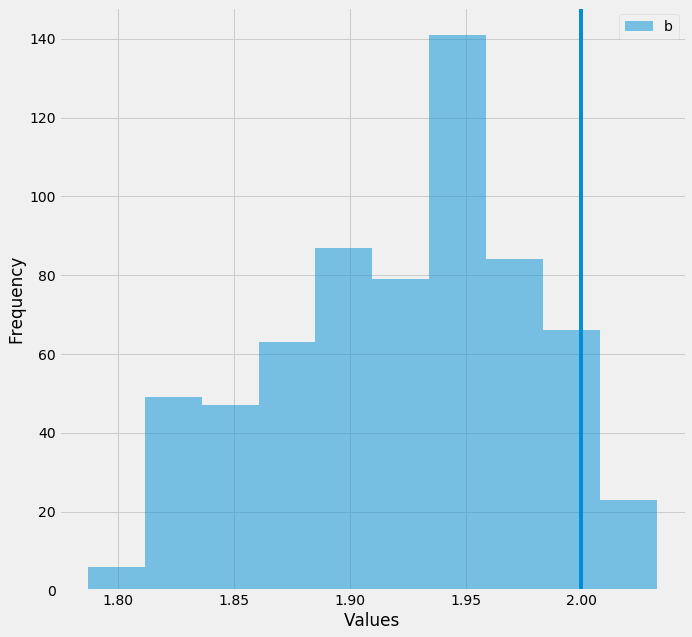

In [12]:
plt.figure(figsize = (10,10))
plt.hist(b_sample[1000: 2000], label = 'b',alpha=0.5);
plt.grid('True')
plt.xlabel('Values')
plt.axvline(2)
plt.legend()
plt.ylabel('Frequency');

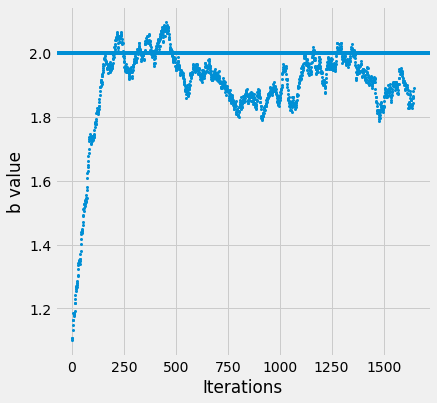

In [13]:
iteraciones = np.linspace(1, len(b_sample), len(b_sample))

plt.figure(figsize = (6,6))
plt.plot(iteraciones, b_sample, 'o', markersize = 2)
plt.grid('True')
plt.xlabel('Iterations')
plt.axhline(2)
plt.ylabel('b value');

Ahora utilizamos corner para observar las distribuciones de $a$ y $b$, así como a contra $b$ en una sola figura. 

In [14]:
a_array = np.array(a_sample[1000:2000])
b_array = np.array(b_sample[1000:2000])

samples = np.array([a_array, b_array])

samples = samples.T

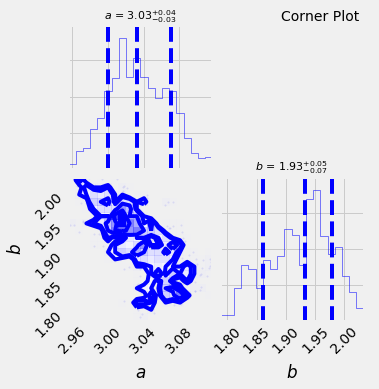

In [15]:
# Make the base corner plot
figure = corner.corner(samples, color = 'blue',labels=[r"$a$", r"$b$"],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 11})
figure.gca().annotate("Corner Plot",
                      xy=(1.0, 1.0), xycoords="figure fraction",
                      xytext=(-20, -10), textcoords="offset points",
                      ha="right", va="top");

* Ejemplo con 3 datos. Añadiremos un tercer data al corner como ejemplificación.

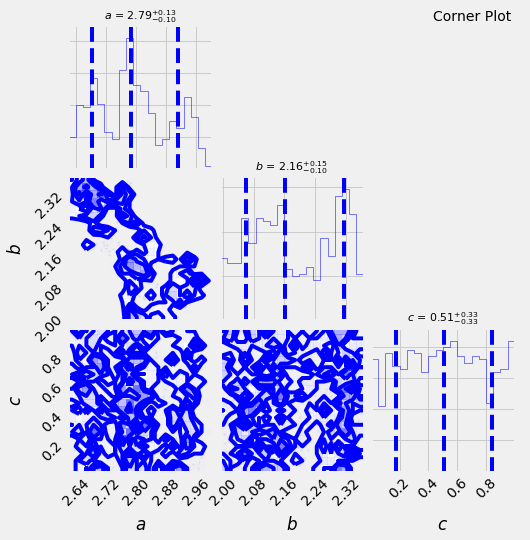

In [47]:
a_array = np.array(a_sample[1000:2000])
b_array = np.array(b_sample[1000:2000])
c_array = np.random.rand(len(a_array))
                         
samples = np.array([a_array, b_array, c_array])

samples = samples.T

figure = corner.corner(samples, color = 'blue',labels=[r"$a$", r"$b$", r"$c$"],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 11})
figure.gca().annotate("Corner Plot",
                      xy=(1.0, 1.0), xycoords="figure fraction",
                      xytext=(-20, -10), textcoords="offset points",
                      ha="right", va="top");

*Fin del ejemplo. 

Después de haber realizado el corner plot, continuamremos con la gráfica de la distribución de $a$.

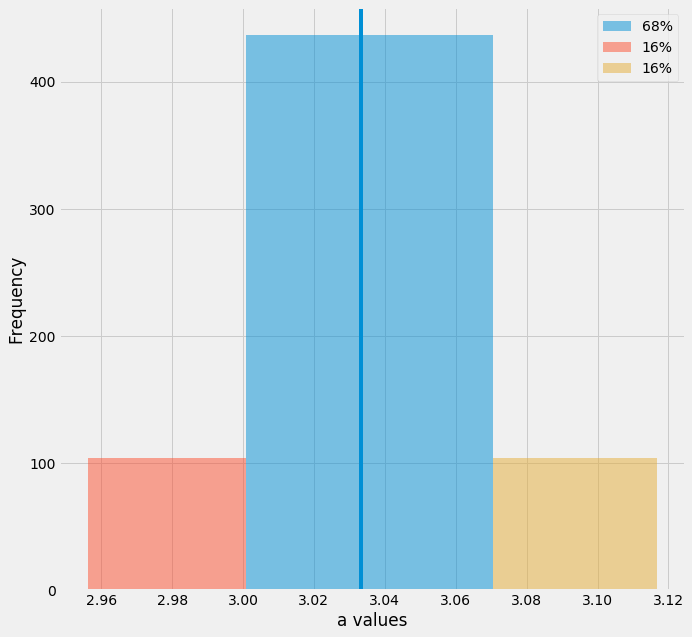

In [16]:
a_mediana = np.median(a_array)
a_16 = np.percentile(a_array,16)
a_84 = np.percentile(a_array,84)

plt.figure(figsize = (10,10))
plt.hist(a_array, bins = 1, range = (a_16, a_84), label = ('68%'), alpha=0.5);
plt.hist(a_array, bins = 1, range = (min(a_array), a_16), label = ('16%'), alpha=0.5);
plt.hist(a_array, bins = 1, range = (a_84, max(a_array)), label = ('16%'), alpha=0.5);
plt.grid('True')
plt.xlabel('a values')
plt.axvline(a_mediana)
plt.legend()
plt.ylabel('Frequency');

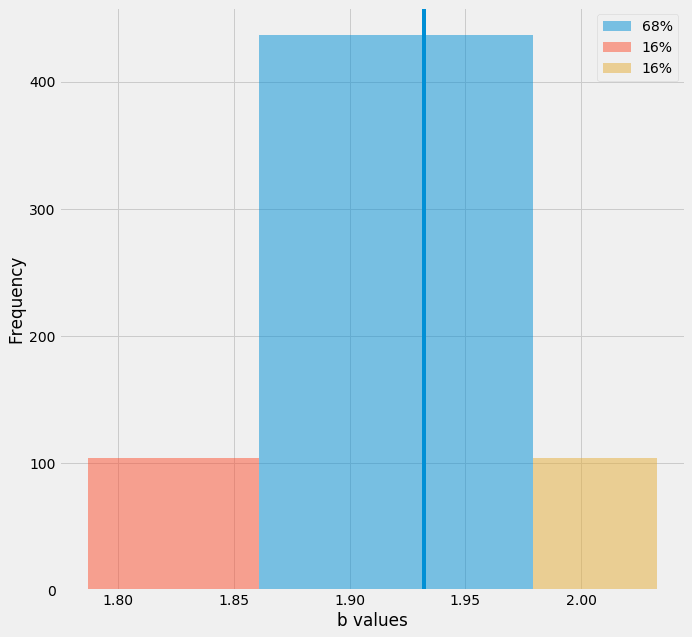

In [17]:
b_mediana = np.median(b_array)
b_16 = np.percentile(b_array,16)
b_84 = np.percentile(b_array,84)

plt.figure(figsize = (10,10))
plt.hist(b_array, bins = 1, range = (b_16, b_84), label = ('68%'), alpha=0.5);
plt.hist(b_array, bins = 1, range = (min(b_array), b_16), label = ('16%'), alpha=0.5);
plt.hist(b_array, bins = 1, range = (b_84, max(b_array)), label = ('16%'), alpha=0.5);
plt.grid('True')
plt.xlabel('b values')
plt.axvline(b_mediana)
plt.legend()
plt.ylabel('Frequency');

Ahora calculamos **acc** y **bcc**:

In [18]:
acc = len(a_sample)/rango
acc

0.8225

In [19]:
bcc = len(b_sample)/rango
bcc

0.8225

### **Múltiples caminos**

In [20]:
a_total = []
b_total = []

sigma = 0.01
rango = 2500

for k in range(10):   
    a0 = np.random.normal(4, 3, 10)
    b0 = np.random.normal(4, 3, 10)
    a_sample = [a0[k]]
    b_sample = [b0[k]]
    lnlike0 = -1*likelihood(a0[k], b0[k], [x,y,yerror])
    for j in range(1,rango):
        a_new = np.random.normal(a_sample[len(a_sample)-1], sigma)
        b_new = np.random.normal(b_sample[len(b_sample)-1], sigma)
        like = -1*likelihood(a_new, b_new, [x,y,yerror])
        if like>lnlike0:
            lnlike0 = like
            a_sample.append(a_new)
            b_sample.append(b_new)
        elif lnlike0-like<-math.log(random.uniform(0,1)):
            lnlike0 = like
            a_sample.append(a_new)
            b_sample.append(b_new)
    a_total.append(a_sample)
    b_total.append(b_sample)

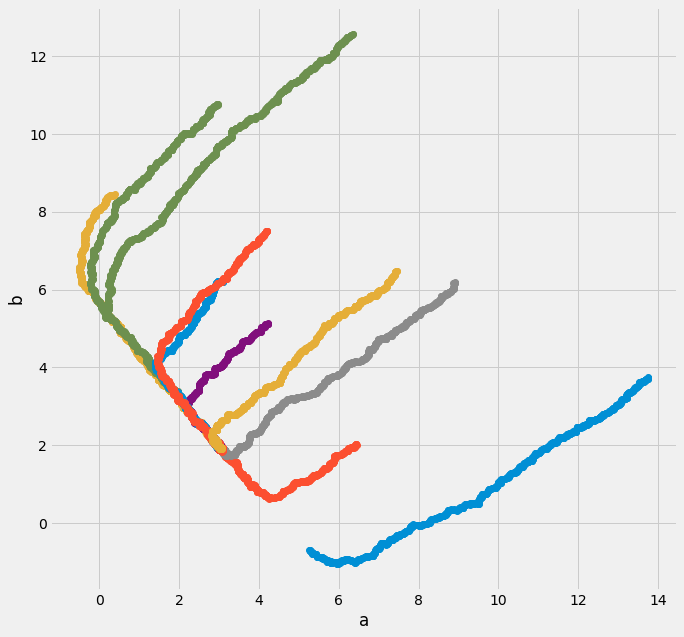

In [21]:
plt.figure(figsize = (10,10))
for i in range(10):
    plt.plot(a_total[i], b_total[i], 'o');
plt.grid('True')
plt.xlabel('a')
plt.ylabel('b');

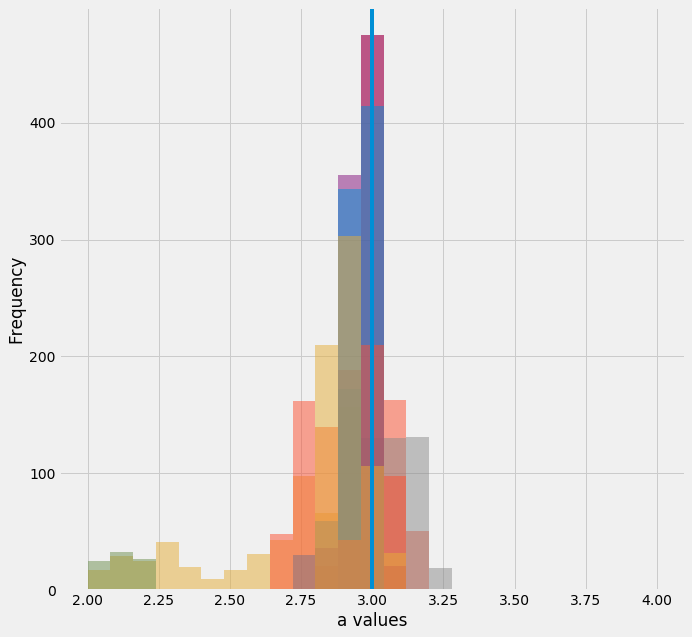

In [22]:
plt.figure(figsize = (10,10))
for i in range(10):
    plt.hist(a_total[i][950:2500], 25, range = (2,4), alpha=0.5);

plt.grid('True')
plt.xlabel('a values')
plt.axvline(3)
plt.ylabel('Frequency');

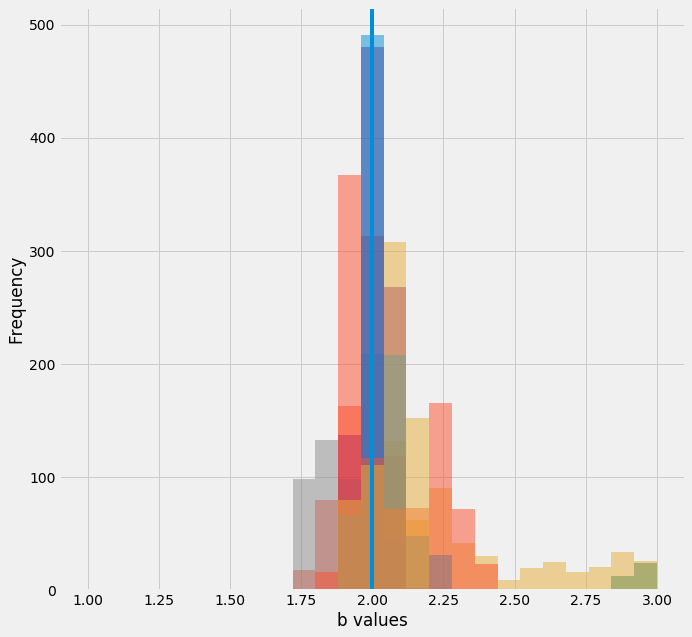

In [23]:
plt.figure(figsize = (10,10))
for i in range(10):
    plt.hist(b_total[i][950:2500], 25, range = (1,3), alpha=0.5);

plt.grid('True')
plt.xlabel('b values')
plt.axvline(2)
plt.ylabel('Frequency');

### **Inferencia bayesiana**

Utilizamos las funciones anteriores para calcular el likelihood:

In [48]:
def function(x0, a0, b0):
    return a0*x0 + b0

def likelihood(a, b, data):
    equis = data[0]
    ye = data[1]
    yerr = data[2] 
    model = function(equis, a, b)
    likelihood_0 = (ye-model)**2/(yerr**2)
    return likelihood_0.sum()

Definimos una función llamada *prior* para obtener el peso de los valores $a$ y $b$ nuevos. Suponemos que $a$ tiene una distribución normal con media iguala a 3.5 y desviación estándar igual a 1. También suponemos que $b$ tiene distribución normal con media igual a 1.5 con desviacióne estándar igual a 1.

In [49]:
meana = 3.5
meanb = 1.5
std = 1
def prior(a,b):
    priora = scipy.stats.norm.pdf(a,meana,std)
    priorb = scipy.stats.norm.pdf(b,meanb,std)
    return priora, priorb

In [72]:
rango = 2000

a0 = 2.1
b0 = 1.1
lnlike0 = -1*likelihood(a0, b0, [x,y,yerror])
posterior0 = lnlike0*prior(a0,b0)[0]

a_sample = [a0]
b_sample = [b0]

sigma = 0.01

for j in range(1,rango):
    a_new = np.random.normal(a_sample[len(a_sample)-1], sigma)
    b_new = np.random.normal(b_sample[len(a_sample)-1], sigma)
    like = -1*likelihood(a_new, b_new, [x,y,yerror])
    posterior = like*prior(a_new,b_new)[0]*prior(a_new,b_new)[1]
    if posterior>posterior0:
        posterior0 = posterior
        a_sample.append(a_new)
        b_sample.append(b_new)
    elif posterior0-posterior<-math.log(random.uniform(0,1))*prior(a_new,b_new)[0]*prior(a_new,b_new)[1]:
        posterior0 = posterior
        a_sample.append(a_new)
        b_sample.append(b_new)

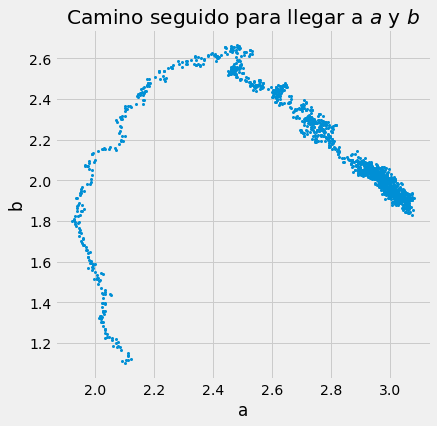

In [73]:
plt.figure(figsize = (6,6))
plt.plot(a_sample,b_sample, 'o', markersize = 2)
plt.xlabel('a')
plt.ylabel('b')
plt.title('Camino seguido para llegar a $a$ y $b$')
plt.grid('True')

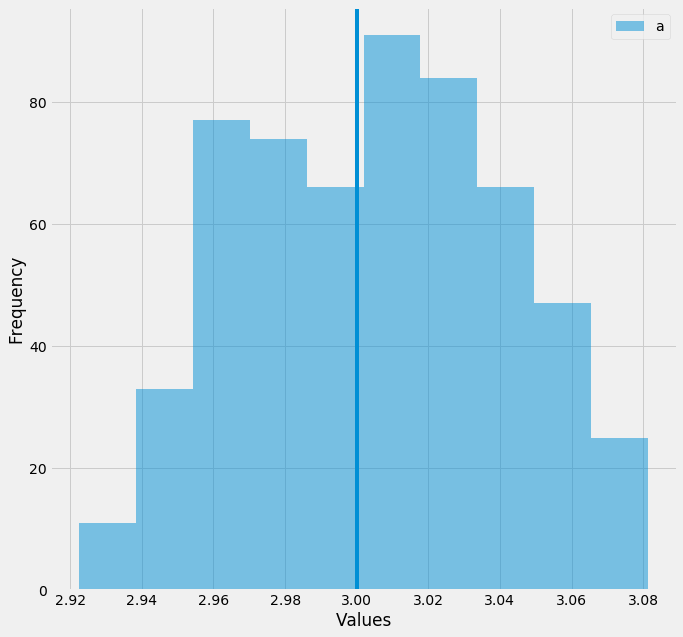

In [74]:
plt.figure(figsize = (10,10))
plt.hist(a_sample[1000: 2000], label = 'a',alpha=0.5);
plt.grid('True')
plt.xlabel('Values')
plt.axvline(3)
plt.legend()
plt.ylabel('Frequency');

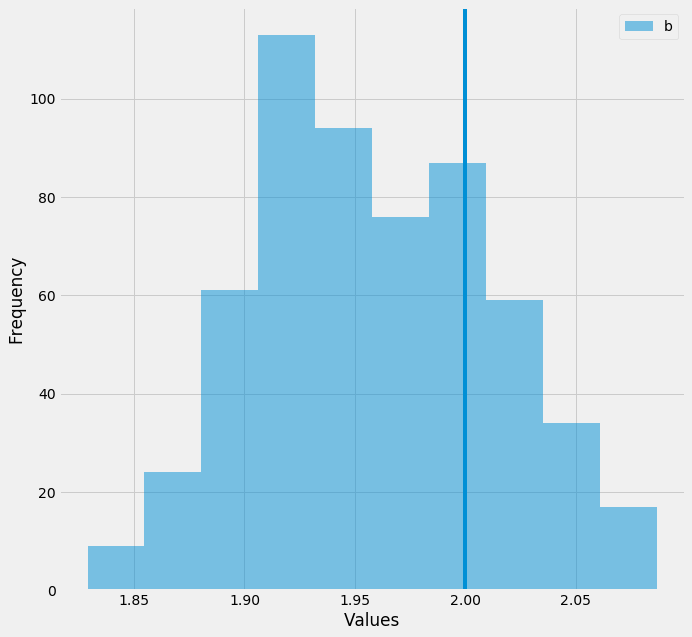

In [75]:
plt.figure(figsize = (10,10))
plt.hist(b_sample[1000: 2000], label = 'b',alpha=0.5);
plt.grid('True')
plt.xlabel('Values')
plt.axvline(2)
plt.legend()
plt.ylabel('Frequency');

Ahora suponemos que $a$ tiene una distribución uniforme de 2.5 a 3.5. También suponemos que $b$ tiene distribución uniforme de 1.5 a 2.5. En este caso, la probabilidad de a es 1 y la probabilidad de b también es 1.

In [91]:
rango = 2000

a0 = 3.0
b0 = 2.0
lnlike0 = -1*likelihood(a0, b0, [x,y,yerror])
posterior0 = lnlike0*prior(a0,b0)[0]

a_sample = [a0]
b_sample = [b0]

sigma = 0.01

priora = 1
priorb = 1

for j in range(1,rango):
    a_new = np.random.normal(a_sample[len(a_sample)-1], sigma)
    b_new = np.random.normal(b_sample[len(a_sample)-1], sigma)
    if a_new <= 3.5 and a_new >= 2.5:
        if b_new <= 2.5 and b_new >= 1.5:
            like = -1*likelihood(a_new, b_new, [x,y,yerror])
            posterior = like*priora*priorb
            if posterior>posterior0:
                posterior0 = posterior
                a_sample.append(a_new)
                b_sample.append(b_new)
            elif posterior0-posterior<-math.log(random.uniform(0,1))*priora*priorb:
                posterior0 = posterior
                a_sample.append(a_new)
                b_sample.append(b_new)

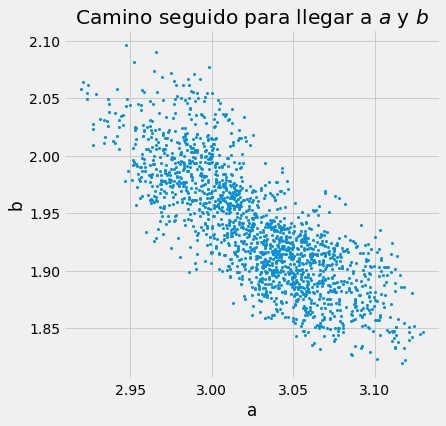

In [92]:
plt.figure(figsize = (6,6))
plt.plot(a_sample,b_sample, 'o', markersize = 2)
plt.xlabel('a')
plt.ylabel('b')
plt.title('Camino seguido para llegar a $a$ y $b$')
plt.grid('True')

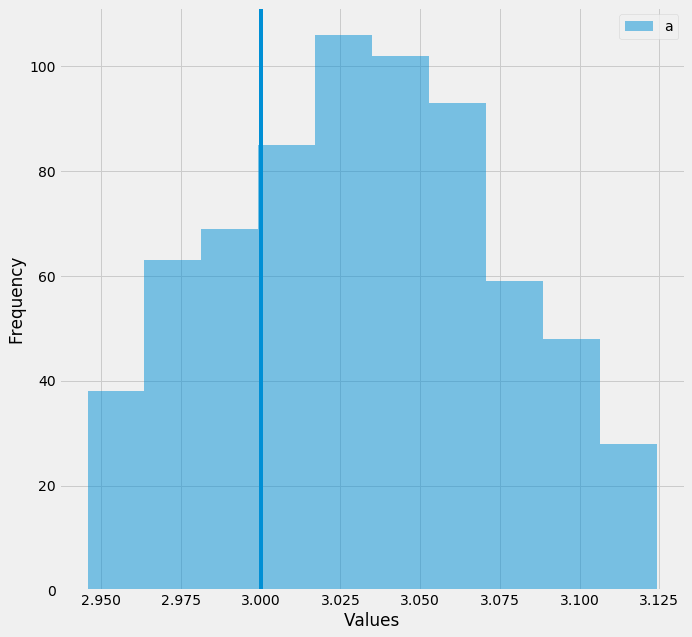

In [93]:
plt.figure(figsize = (10,10))
plt.hist(a_sample[1000: 2000], label = 'a',alpha=0.5);
plt.grid('True')
plt.xlabel('Values')
plt.axvline(3)
plt.legend()
plt.ylabel('Frequency');

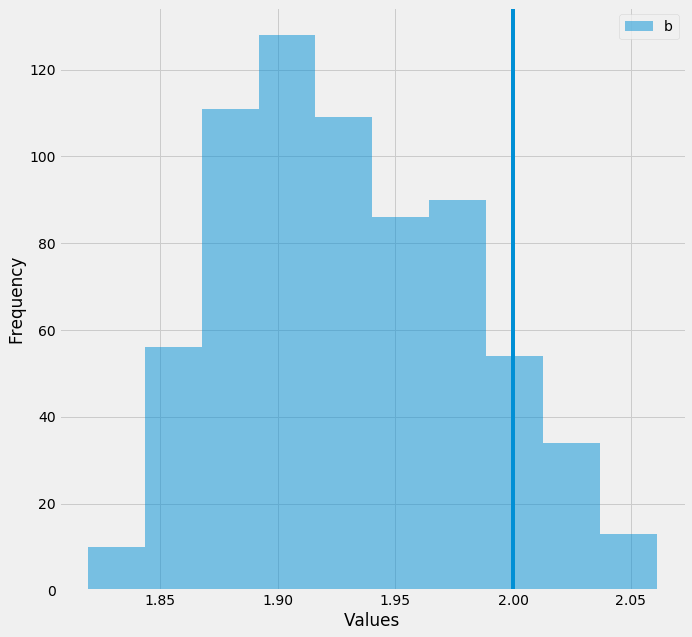

In [94]:
plt.figure(figsize = (10,10))
plt.hist(b_sample[1000: 2000], label = 'b',alpha=0.5);
plt.grid('True')
plt.xlabel('Values')
plt.axvline(2)
plt.legend()
plt.ylabel('Frequency');